# 차원에 대한 강의

In [ ]:
import numpy as np

x1 = np.array([5.1, 3.5, 1.4, 0.2])
print(x1.ndim, x1.shape)
x2 = np.array([4.9, 3.0, 1.4, 0.2])
x3 = np.array([4.7, 3.2, 1.3, 0.2])

plus_x = np.array([x1, x2, x3])
print(plus_x.ndim, plus_x.shape)

1 (4,)
2 (3, 4)


2 (2, 2)
3 (3, 2, 2)


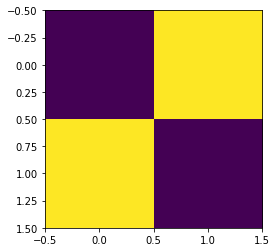

In [ ]:
import matplotlib.pyplot as plt

img1 = np.array([[0, 255], [255, 0]])
print(img1.ndim, img1.shape)

img2 = np.array([[255,255], [255,255]])
img3 = np.array([[0,0], [0,0]])

img_set = np.array([img1, img2, img3])
print(img_set.ndim, img_set.shape)

plt.imshow(img1)

# 샘플 이미지셋 수업

> Flatten 을 활용



    MNIST : 손글씨 이미지셋 (60000, 28, 28)
    CIFAR10 : 10가지 분류 사물 이미지셋(50000, 32, 32)

In [ ]:
import tensorflow as tf

In [ ]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()         # _ 가 변수로 작용한다.(현재 수업에서는 사용하지 않을 값이라 비워둔다)
print(mnist_x.shape, mnist_y.shape)                                 # 아마 원래는 test_image, test_labels 를 사용해서 코딩을 했었는데 여기서는 자료만 필요해서 비워둔듯

(cifar10_x, cifar10_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar10_x.shape, cifar10_y.shape)

In [ ]:
print(mnist_y[0:10])

import matplotlib.pyplot as plt
plt.imshow(mnist_x[9], cmap='gray')       # cmap = color map 인듯

In [ ]:
print(cifar10_y[:10])

plt.imshow(cifar10_x[1])

In [ ]:
import numpy as np

d1 = np.array([1, 2, 3, 4, 5])
print(d1.shape)

d2 = np.array([d1, d1, d1, d1])
print(d2.shape)

d3 = np.array([d2, d2, d2])
print(d3.shape)

d4 = np.array([d3, d3])
print(d4.shape)

In [ ]:
print(mnist_y.shape)
print(cifar10_y.shape)

In [ ]:
x1 = np.array([1, 2, 3, 4, 5])
print(x1.shape)
print(mnist_y[:5])
print(mnist_y[:5].shape)

x2 = np.array([[1, 2, 3, 4, 5]])                                                # 변수 5개짜리를 1개 들고있다. 그래서 출력값이 (1,5)로 나오는 것을 알수있다
print(x2.shape)

x3 = np.array([[1], [2], [3], [4], [5]])                                        # 변수 1개짜리를 5개 들고있어서 (5,1)로 출력값이 나온다.
print(x3.shape)
print(cifar10_y[:5])                                                            # 출력값을 보면 [6],[9],[9],[4],[1] 인것으로 보아 1개짜리 5개를 들고있으므로 (5,1) 이고 2차원이다.
print(cifar10_y[:5].shape)

# Conversion 2d

In [ ]:
# X = Input(shape=[28,28,1])
# H = Conv2D(3, kernel_size=5, activation='swish')(X)
# H = Conv2D(6, kernel_size=5, activation='swish')(H)
# H = Flatten()(H)
# H = Dense(84, activation = 'swish')(H)
# Y = Dense(10, activation = 'softmax')(H)

# model = models.Model(X,Y)
# model.compile(loss='scategorical_crossentropy', metrics='accuracy')

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import layers, models

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=[28,28,1]))
model.add(layers.Conv2D(3, kernel_size=5, activation='swish'))
model.add(layers.Conv2D(6, kernel_size=5, activation='swish'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation = 'swish'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
pred = model.predict(독립[:5])
pd.DataFrame(pred).round(4)

In [ ]:
종속[:5]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                201684    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_________________________________________________________________


# Maxpool 강의


> Pooling Layer




In [ ]:
import tensorflow as tf
import pandas as pd
from keras import layers, models

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()

독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)

print(독립.shape, 종속.shape)

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=[28,28,1]))
model.add(layers.Conv2D(3, kernel_size=5, activation='swish'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(6, kernel_size=5, activation='swish'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())
model.add(layers.Dense(84, activation='swish'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=5)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                8148      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# Lenet

In [1]:
import tensorflow as tf
import pandas as pd
from keras import layers, models

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

In [3]:
model = models.Sequential()
model.add(layers.Input(shape=[28,28,1]))
model.add(layers.Conv2D(6, kernel_size=5, padding='same', activation='swish'))   # padding='same' 의 의미는 앞의 인풋의 모양과 같은 모양의 결과물로 뽑아줌.
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(16, kernel_size=5, activation='swish'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='swish'))
model.add(layers.Dense(84, activation='swish'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

# Lenet ver.cifar10

In [5]:
import tensorflow as tf
import pandas as pd
from keras import layers, models

In [10]:
(독립, 종속), _ =tf.keras.datasets.cifar10.load_data()
종속 = pd.get_dummies(종속.reshape(50000))                # 2차원의 형태라 원핫인코딩이 바로 안됨. 1차원으로 reshape 해주고 원핫인코딩하기
print(독립.shape, 종속.shape)

(50000, 32, 32, 3) (50000, 10)


In [11]:
model = models.Sequential()
model.add(layers.Input(shape=[32, 32, 3]))
model.add(layers.Conv2D(6, kernel_size=5, activation='swish'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(16, kernel_size=5, activation='swish'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='swish'))
model.add(layers.Dense(84, activation='swish'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=15)

In [ ]:
model.summary()

In [18]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(독립[1])

# My_image 분류

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [3]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [4]:
X = tf.keras.layers.Input(shape=[28, 28, 1])
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(128, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [5]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 9s 3ms/step - loss: 0.7795 - accuracy: 0.7706
Epoch 2/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2829 - accuracy: 0.9143
Epoch 3/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2149 - accuracy: 0.9335
Epoch 4/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1706 - accuracy: 0.9482
Epoch 5/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1381 - accuracy: 0.9563
Epoch 6/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1141 - accuracy: 0.9625
Epoch 7/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0966 - accuracy: 0.9693
Epoch 8/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0761 - accuracy: 0.9761
Epoch 9/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0622 - accuracy: 0.9794
Epoch 10/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0525 - accuracy: 0.9839

In [ ]:
종속[:10]

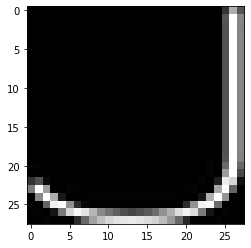

In [5]:
독립 = 독립.reshape(18724, 28, 28)
plt.imshow(독립[3], cmap='gray')

In [6]:
import PIL
from PIL import Image
import os
from os import remove

In [77]:
img_file = glob.glob('/content/sample/*')
arr = np.array([])
for file in img_file : 
  imgs = Image.open(file)
  imgs = imgs.resize((28,28))
  imgs = imgs.convert('L')
  title, ext = os.path.splitext(file)
  # imgs.save(f'{title}_test{ext}')

  remove(file)

In [79]:
img_file = glob.glob('/content/sample/*')
Im = np.array([plt.imread(img_file[i]) for i in range(len(img_file))])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: ignored

In [ ]:
# imgs = Image.open('./content/sample/*')
# for img in imgs :

#   img = img.resize((28,28))
#   img_data = np.array(img)
#   img_data.shape          # 28, 28, 4 로 나오는 이유는 아마 CYNK 인것같다.

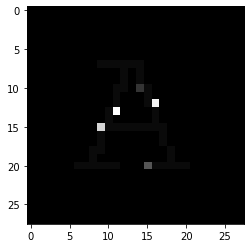

In [30]:
plt.imshow(img_data, cmap='gray')

In [31]:
trans_img = img_data.transpose(2,0,1)
trans_mg.shape

ValueError: ignored